
# Introduction to Modern AI - HW 1
Gavin Hartnett  
PRGS, Winter Quarter 2021

This HW is worth 12.5% of your grade. Complete the assignment by making a local copy of this Colab Notebook and filling in the responses in your local copy. If you do not know how to typset math in LaTeX, feel free to email me a scanned piece of paper with your work instead.

**Due: Friday, Jan 14 by 5pm (Pacific time)**

---
## Problem 1: Linear Regression

**Part A)**
In class we discussed how to fit linear regression by minimizing the mean squared error (MSE). The equations that determine the fit parameters $(\boldsymbol{w}_*, b_*)$ are

$$ \nabla_{\boldsymbol{w}} \text{MSE}(\boldsymbol{w}, b) \Big|_{(\boldsymbol{w}^*, b^*)} = 0 \,, \qquad \nabla_{b} \text{MSE}(\boldsymbol{w}, b) \Big|_{(\boldsymbol{w}^*, b^*)} = 0 \,.$$

If you've ever done a linear regression before, you probably used a software package that solved these equations (and did many other things, such as computing the $R^2$ coefficient). For this problem, we will derive the solution ourselves. To make our life easier, let's ignore the bias term, and set $b=0$. Work out the derivative of the MSE with respect to the weight vector $\boldsymbol{w}$ and solve for the best-fit value $\boldsymbol{w}_*$.

Note: this question is meant to gauge your multi-variate calculus ability. If you are unduly struggling, please reach out to me or another student to get help.

Your answer here.

Let's consider applying this to a real-world dataset.

In [ ]:
## imports

## numpy and scikit-learn will be useful libraries for this exercise
import numpy as np
import sklearn.datasets

## plotting library
import matplotlib
import matplotlib.pyplot as plt

## some commands to make the plots look nicer
plt.style.use('seaborn-white')

In [ ]:
## increase the font size
matplotlib.rcParams.update({'font.size': 16})

In [ ]:
## let's load an example dataset from the scikit-learn (sklearn) library
dataset = sklearn.datasets.load_diabetes()

In [ ]:
## the dataset object is actually a Python dictionary
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
## Inspect the dimensionality of the data
dataset.data.shape

(442, 10)

In [ ]:
## The 10 features are
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
## extract the (X,Y)'s
X = dataset.data
y = dataset.target

## define the dimensions of the data
N = X.shape[0]
p = X.shape[1]

Earlier, we set the bias term $b=0$ in doing our derivation in order to make our lives easier. Actually, there's a little trick we can do to restore this term in our solution without doing any additional work.

If $\boldsymbol{x}$ is a $p$-dim vector, let's consider the enlarged $(p+1)$-dim vector given by

$$ \boldsymbol{x}' = (\boldsymbol{x}, 1) \,. $$

Let's also enlarge the vector of weights in the same way,

$$ \boldsymbol{w}' = (\boldsymbol{w}, b) \,. $$

Now notice that the linear model (in terms of the primed variables) with no bias term naturally incorporates a bias term when expressed in terms of the original vectors:

$$ \boldsymbol{w}'^T \boldsymbol{x}' = \boldsymbol{w}^T \boldsymbol{x} + b \,,$$

In other words, we were able to set $b=0$ above with really no loss in generality, and we can easily accomodate the bias term by simply adding 1 to each $\boldsymbol{x}$ value in our dataset. If we want to do this for every single data point at once, we can consider the $N\times p$ matrix $X$ and just add a column vector of 1's to it.

In [ ]:
## add a column vector of 1's to the X matrix
## this lets us incorporate a bias term easily
X_enlarged = np.concatenate((X, np.ones(N)[:,None]), axis=1)
X_enlarged.shape

(442, 11)

In [ ]:
## shuffle the data
## this is just good practice
permutation = np.arange(N) ## SC: Creating a list of N elements
np.random.shuffle(permutation) #this is an in-place operation. SC: Shuffle the "permutation" list

X = X[permutation,:]
X_enlarged = X_enlarged[permutation,:]
y = y[permutation]

**Part B)**

Implement the above solution you derived for the OLS linear regression fit to the data. You will find the following numpy commands helpful:

np.transpose(X) - transpose the matrix X  
np.linalg.inverse(X) - invert the matrix X  
np.dot(A, B) - find the dot product between two matrices, vectors, or matrix-vector pair.



In [ ]:
## your answer here
X_enlargedT = np.transpose (X_enlarged)
X_etranpose_dot_X_e = np.dot (X_enlargedT, X_enlarged)
Inverse_X_etranpose_dot_X_e = np.linalg.inv(X_etranpose_dot_X_e)
X_e_tranpose_dot_y = np.dot (X_enlargedT, y)
beta = np.dot (Inverse_X_etranpose_dot_X_e, X_e_tranpose_dot_y)
beta

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639,  152.13348416])

**Part C)**

Now let's compare this to the answer we get when we use a built-in linear regression solver. Use scikit-learn to fit a regression model to the data and verify that the fitted parameters it returns agree with our wstar solution above.

Hints
- Feel free to use the [scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to see how to use their linear regression solver. This skill, being able to g to a docs page and teach yourself how to use a particular software package, is a key part of doing ML/data science.
- We need to be careful to use the original (not the enlarged) X matrix.

In [ ]:
# Model Define - Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)

print(model.intercept_)
print(model.coef_)


152.1334841628965
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [ ]:
beta.shape

(11,)

**Part D)**

Finally, let's try to gain a sense for the MSE loss function. What does it *look* like? Well, it's a bit hard to visualize because it's a function of 11 parameters (10 weights and a bias). One solution is to just look at a 1d slice of this 11d space - of course this can't give us the whole picture, but it's better than nothing.

There are a lot of ways to pick the 1d slice. A natural one is to look at the loss function along the array picked out by our optimal solution, i.e.

$$ \boldsymbol{w}(t) = \boldsymbol{w}_* t \,, \quad t \in \mathbb{R} \,.  $$

This is a family of vectors (directions). For $t=0$ it's the origin, and for $t=1$ it's the best-fit vector. Define a Python function for the MSE as a function of $t$ and plot it. For what value of $t$ is the MSE the smallest? Does this make sense?

In [ ]:
## your answer here

step = np.linspace (-5,5,100)

def MSE(w):
  y_pred_by_hand = np.dot (w, X_enlarged)
  mse = sklearn.metrics.mean_squared_error(y, y_pred_by_hand)
  return mse
def MSE_along1d (t):
  new_weight = t* beta
  mse_along1d= MSE(new weight)
  return mse_along1d, new weight

MSE_for_different_t = []
w_for different_t = []

for t in step:
  result = mse_along1d(t) # result is a tupple
  MSE_for_different_t.append(result[0])
  w_for_different_t.append(result[1])

  ## now simply plot "MSE_for_different_t" with " w_for_different_t".


ValueError: ignored

Without giving too much away, your plot should look like a "U" shape. Of course, we can't conclude much about the full 11-d shape of the loss just from this 1d slice, but it turns out that in this case such an unjustified extrapolation actually gives the right answer. The full loss function looks like a big bowl in 11d space. This is because the loss function is a quadratic polynomial - take the linear model $f$ and square it to build the MSE.

**Debrief**

Congratulations! You just implemented from scratch your first basic machine learning model! Normally we'd be interested in evaluating the performance on the model on unseen data, but we've beaten this linear regression horse enough for today.

---
## Problem 2: (Binary) Logistic Regression

Now we will explore some basic properties of logistic regression, again using one of the included sample datasets in the scikit-learn library.

As much as I'd love to ask you to derive the optimal, best-fit solution as I did for the linear regression problem, I can't, because a closed-form solution does not exist. Even though logistic regression is still a linear model, the loss function is now more complicated than before, and involves non-linearities (such as $\ln$, $\exp$) which complicate the expression enough to preclude a simple closed form solution.  

In [ ]:
## let's load an example dataset from the scikit-learn (sklearn) library
dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
## the dataset object is actually a Python dictionary
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
## Inspect the dimensionality of the data
dataset.data.shape

(569, 30)

In [ ]:
## The 30 features are
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
## extract the (X,Y)'s
X = dataset.data
y = dataset.target

## define the dimensions of the data
N = X.shape[0]
p = X.shape[1]

In [ ]:
## shuffle the data
## this is just good practice
permutation = np.arange(N)
np.random.shuffle(permutation) #this is an in-place operation

X = X[permutation,:]
y = y[permutation]

In [ ]:
## for the logistic regression to converge we need to scale the data
## see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
## for more details if you're curious
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X  = scaler.fit_transform(X)

In [ ]:
## the y-values are binary
y

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,

In [ ]:
## split the data into a test and train set
Ntrain = int(0.8 * N) # let's do an 80/20 split
Ntest = N - Ntrain

X_train = X[:Ntrain]
y_train = y[:Ntrain]

X_test = X[Ntrain:]
y_test = y[Ntrain:]

**Part A)**

Use scikit-learn to fit a logistic regression model to the *training* data.

Hints
- Feel free to use the [scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to see how to use their logistic regression solver.

In [ ]:
# Help: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Part B)**

Having fit the model to the training data, let's look at the predictions for the as-yet unseen testing data. This can be accomplished by running ```model.predict(X_test)```, if you called your scikit-learn model ```model```.

If you recall, in class I actually never explained how to get the predictions from this model. I explained how we get the estimate for the probabilities $p(y=1|\boldsymbol{x})$. These can be obtained using ```model.predict_proba(X_test)```.

Question: Explain how the predictions are related to the probability estimates. Verify that your answer is correct by checking that it correctly reproduces the scikit-learn predictions when applied to the scikit-learn probabilities.

your answer here

In [ ]:
## your answer here
y_pred = model.predict(X_test)

import pandas as pd
pred_proba_df = pd.DataFrame(model.predict_proba(X_test)) # predict the probabilities of each class
Y_prob_pred = pred_proba_df.applymap(lambda x: 1 if x>0.5 else 0) # use the probabilities to predict class with threshold 0.5
Y_prob_pred.columns = ["0", "1"] # Set the column names of Y_prob_pred dataframe
df=pd.DataFrame([y_test,y_pred], index=["y_test","y_pred"])
df = df.transpose()
df["y_prob_pred"] = np.where (Y_prob_pred["0"]>Y_prob_pred["1"], 0, 1)# Data frame presenting the actual values (y_test),...
# directly predicted values using predict function (y_pred) & values predicted from probabilities(y_prob_pred)
df

Answer: As the automatic sci-kit learning predictions and the predictions from calculated probability are the same, it is evident that the sci-kit prediction function (model.predict(X_test))used a threshold of P>=0.5 for binary classifications.

In [ ]:
## let's compute the test set accuracy
np.mean(y_test == y_pred) # https://stackoverflow.com/questions/42140113/numpy-mean-with-comparison-operator-in-the-parameter

0.9824561403508771

**Part C)**

Finally, let's investigate the ROC curve for our model. Use the [built-in scikit-learn function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot this. What can you learn from the performance of the model by looking at this plot?

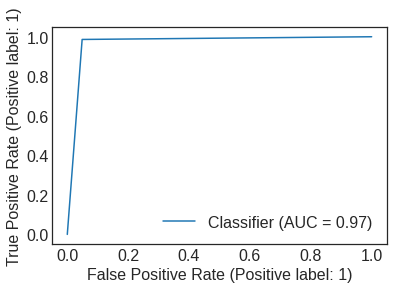

In [ ]:
#Help: https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)

**Part D)**  
In class I explained that the loss function for logisic regression is the Binary Cross Entropy (BCE) loss. You may be wondering where this particular loss function comes from.

Show that it corresponds to the Negative Log Likelihood (NLL) (up to a constant), so that minimizing the BCE loss corresponds to maximizing the likelihood. To help you get started, here are expressions for BCE and the likelihood L:

$$\text{BCE} = - \frac{1}{N} \sum_{i=1}^N \Big( y_i \ln p(y=1|x_i) + (1-y_i) \ln \left(1 - p(y=1|x_i) \right) \Big) $$

$$ L = \prod_{i=1}^N p(y_i |x_i) $$

your answer here